# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import time
import torch
from collections import deque
import matplotlib.pyplot as plt

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
# The path to the environment must be updated to match the location 
# of the executable.
env = UnityEnvironment(file_name="../../Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Train the Model

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
# There is no need to start at the top of this notebook.  If you want to skip 
# right to training, run this cell for imports/environment definition and 
# continue on.  If the environment has already been defined above, then no 
# need to do it again here.
#
# ALERT: If you run the environment and then close it, you can not re-run 
#        the training loop without restarting the kernel or you may get 
#        a broken pipe to the Unity environment.  This occurs on Mac environments
#        and is untested on other OS's
#
try:
    # see if environment is defined from running the code above.
    # if it is, do not redefine env.
    env
except:
    from unityagents import UnityEnvironment
    import numpy as np
    import time
    import torch
    from collections import deque
    import matplotlib.pyplot as plt

    env = UnityEnvironment(file_name="../../Banana.app")    


In [6]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

Interogate the environment to determine the size of the action space as well as the states.  This is required when we move on to defining our agent to operate in this environment.

In [7]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [0.         1.         0.         0.         0.16895212 0.
 1.         0.         0.         0.20073597 1.         0.
 0.         0.         0.12865657 0.         1.         0.
 0.         0.14938059 1.         0.         0.         0.
 0.58185619 0.         1.         0.         0.         0.16089135
 0.         1.         0.         0.         0.31775284 0.
 0.        ]
States have length: 37


The agent will expect a state size and an action size as shown here.
Additionally, our agent is a fully connected network which grows to allow 
more non-linearity in the decision space and has hidden layers with ReLU
activation functions of size:
- input:  state_size    = (37)
- fc1:    state_size*2  = (74)
- fc2:    state_size*4  = (148)
- fc3:    state_size*4  = (148)
- fc4:    state_size*2  = (74)
- output: action_size   = (4)

In [8]:
from dqn_agent import Agent
agent = Agent(
    state_size=state_size, 
    action_size=action_size, 
    seed=0, 
    fc1_units=state_size*2,
    fc2_units=state_size*4,
)

If you would like to pick up from where you left off from a previous training iteration, load the checkpoint file into both the local and target network.

In [9]:
# # load a checkpoint to start with a trained model.
# agent.qnetwork_target.load_state_dict(torch.load('checkpoint.pth'))
# agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

Episode 100	Average Score: 0.87	Elapsed Time: 105.39 sec
Episode 200	Average Score: 4.22	Elapsed Time: 218.15 sec
Episode 300	Average Score: 6.75	Elapsed Time: 335.13 sec
Episode 400	Average Score: 10.49	Elapsed Time: 453.27 sec
Episode 479	Average Score: 13.02	Elapsed Time: 544.93 sec
Environment solved in 379 episodes!	Average Score: 13.02	Elapsed Time: 544.93 sec
Episode 500	Average Score: 13.35	Elapsed Time: 569.86 sec
Episode 600	Average Score: 13.65	Elapsed Time: 686.16 sec
Episode 700	Average Score: 14.13	Elapsed Time: 804.00 sec
Episode 800	Average Score: 14.71	Elapsed Time: 925.84 sec
Episode 815	Average Score: 15.00	Elapsed Time: 944.29 sec
Environment solved in 715 episodes!	Average Score: 15.00	Elapsed Time: 944.29 sec
Episode 900	Average Score: 14.60	Elapsed Time: 1046.52 sec
Episode 1000	Average Score: 14.00	Elapsed Time: 1171.18 sec
Episode 1100	Average Score: 13.90	Elapsed Time: 1292.38 sec
Episode 1200	Average Score: 14.31	Elapsed Time: 1418.26 sec
Episode 1300	Average

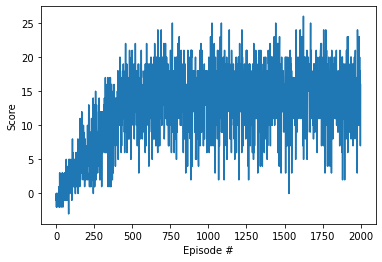

In [10]:
# 
# from the DQN example
#
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    tic = time.time()
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    # average points over 100 episodes that we want to solve for and save 
    # checkpoints for.
    solved_13 = False
    solved_15 = False
    solved_16 = False
    
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        # state = env.reset()                             # gym
        # state, _ = env.reset()                          # gymnasium
        #-------------------------------------------------# Unity
        env_info = env.reset(train_mode=True)[brain_name] # Unity
        state = env_info.vector_observations[0]           # Unity
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            # # next_state, reward, done, _ = env.step(action) # gym
            # next_state, reward, done, _, _ = env.step(action)# gymnasium
            #--------------------------------------------------# Unity
            env_info = env.step(action)[brain_name]            # send the action to the environment
            next_state = env_info.vector_observations[0]       # get the next state
            reward = env_info.rewards[0]                       # get the reward
            done = env_info.local_done[0]                      # see if episode has finished

            agent.step(state, action, reward, next_state, done)
            
            # give an additional penalty to shape the training in a semi-supervised fashion based
            # upon knowledge of the environment
            penalty = 0.
            reward = reward + penalty
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}\tElapsed Time: {:0.2f} sec'.format(i_episode, np.mean(scores_window), time.time() - tic), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}\tElapsed Time: {:0.2f} sec'.format(i_episode, np.mean(scores_window), time.time() - tic))
        if np.mean(scores_window)>=13.0 and not solved_13:
            solved_13 = True
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}\tElapsed Time: {:0.2f} sec'.format(i_episode-100, np.mean(scores_window), time.time() - tic))
            # save 
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_13.pth')
        if np.mean(scores_window)>=15.0 and not solved_15:
            solved_15 = True
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}\tElapsed Time: {:0.2f} sec'.format(i_episode-100, np.mean(scores_window), time.time() - tic))
            # save 
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_15.pth')
        if np.mean(scores_window)>=16.0 and not solved_16:
            solved_16 = True
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}\tElapsed Time: {:0.2f} sec'.format(i_episode-100, np.mean(scores_window), time.time() - tic))
            # save 
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_16.pth')
    torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_final.pth')
    return scores

scores = dqn()
env.close()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [12]:
# Save scores
import pandas as pd
pd.Series(scores).to_csv("scores.csv")

# Watch Trained Agent

In [1]:
# There is no need to start at the top of this notebook.  If you want to skip 
# right to training, run this cell for imports/environment definition and 
# continue on.  If the environment has already been defined above, then no 
# need to do it again here.
#
# ALERT: If you run the environment and then close it, you can not re-run 
#        the training loop without restarting the kernel or you may get 
#        a broken pipe to the Unity environment.  This occurs on Mac environments
#        and is untested on other OS's
#
try:
    # see if environment is defined from running the code above.
    # if it is, do not redefine env.
    env
except:
    from unityagents import UnityEnvironment
    import numpy as np
    import time
    import torch
    from collections import deque
    import matplotlib.pyplot as plt

    # seed=0: has a limit cycle and gets stuck
    # seed=1: threads the needle with some bananas, approaches a line of bananas, turns grabs them
    # env = UnityEnvironment(file_name="../../Banana.app")    
    env = UnityEnvironment(file_name="../../Banana.app", seed=1)    

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [2]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [0.         1.         0.         0.         0.27946243 0.
 1.         0.         0.         0.74556106 0.         0.
 1.         0.         0.48277503 0.         1.         0.
 0.         0.30341193 0.         0.         1.         0.
 0.46494457 0.         0.         1.         0.         0.08466676
 0.         1.         0.         0.         0.95967758 0.
 0.        ]
States have length: 37


In [4]:
from dqn_agent import Agent
agent = Agent(
    state_size=state_size, 
    action_size=action_size, 
    seed=1, 
    fc1_units=state_size*2,
    fc2_units=state_size*4,
)

In [5]:
# load a checkpoint to start with a trained model.
# checkpoint = "checkpoint_13.pth"
# checkpoint = "checkpoint_15.pth"
checkpoint = "checkpoint_Final.pth"

agent.qnetwork_target.load_state_dict(torch.load(checkpoint))
agent.qnetwork_local.load_state_dict(torch.load(checkpoint))


<All keys matched successfully>

In [6]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state)                      # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break

In [7]:
env.close()